# Plotting Accuracy, Predicted, Harvest Metrics

This final notebook uses the statistcs made in "4.0_Accuracy_Assessment.ipynb", percent cover found in "5.0_Percent_Vegetation.ipynb", and harvested data found in the Google Drive to plot the results. First, the overall accuracy will be plotted using Seaborn's categorical plot. Next, correlations are plotted between ground truth references values and colors/indices. Then, percent vegetation is graphed over time. Finally, harvested data is compared to average colors/indicies collected on the final date. 

Luke Rosen

6/16/2022

6/24/2022 Update

Made most of the graphs greyscale.

In [1]:
import seaborn as sns
import pandas as pd
import os
import numpy as np
from datetime import datetime , timedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from scipy import stats

In [2]:
if not os.path.exists("./graphs/"):
    os.mkdir("./graphs/")
graph_out = "./graphs/"     

## Plotting Overall Accuracy

The next few cells use the image statistics to plot overall accuracy over time. Seaborn will be used to create a catagorical plot. Each cover type (post, under, and fallow) are plotted with  the points showing the mean accuracy as a percent and the bars are the confidence interval at 95%. A note that because plots were randomly selected, the cover types are not equally represented. 

In [3]:
Stats = pd.read_csv("./Image_Stats.csv")


C:\Users\Owner\anaconda3\envs\ag_env\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.5882352941176471, 0.5882352941176471, 0.5882352941176471)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


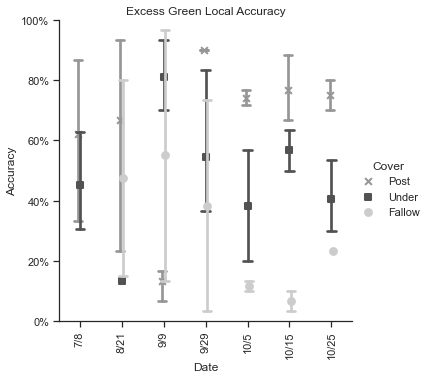

In [4]:
##EXG Local plot 
sns.set_theme(style ="ticks")


ax = sns.catplot(x = "Date", y = "EXG_Local_AC",  hue="Cover", markers = ["x", "s", "o"],  ## 'x', 'square', and 'point'
                 data = Stats, palette = ["#969696", "#525252", "#cccccc"], kind = "point",  capsize = .2, dodge  = True, join = False)
ax.set_ylabels("Accuracy")
ax.set(ylim=(0,1))                                                         ## Y max 100%
ax.axes.flat[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))  ## Decimal to percent
ax.set_xticklabels(["7/8", "8/21", "9/9", "9/29", "10/5", "10/15", "10/25"], rotation= 90)  ## Manual overide date values
ax.set(title= "Excess Green Local Accuracy")

ax.savefig(graph_out + "EXG_LOCAL_AC", dpi = 300)

C:\Users\Owner\anaconda3\envs\ag_env\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.5882352941176471, 0.5882352941176471, 0.5882352941176471)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


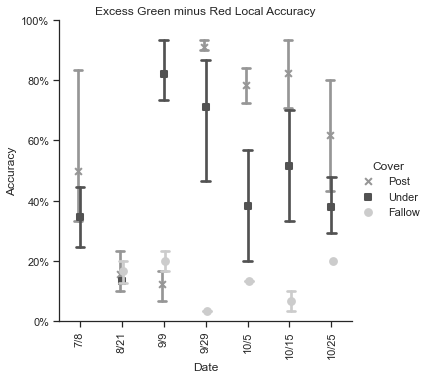

In [5]:
##EXGR Local
sns.set_theme(style ="ticks")


ax = sns.catplot(x = "Date", y = "EXGR_Local_AC",  hue="Cover", markers = ["x", "s", "o"],  ## 'x', 'square', and 'point'
                 data = Stats, palette = ["#969696", "#525252", "#cccccc"], kind = "point",  capsize = .2, dodge  = True, join = False)
ax.set_ylabels("Accuracy")
ax.set(ylim=(0,1))                                                        ## Y max 100%
ax.axes.flat[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1)) ## Decimal to percent
ax.set_xticklabels(["7/8", "8/21", "9/9", "9/29", "10/5", "10/15", "10/25"], rotation= 90)  ## Manual override date values
ax.set(title= "Excess Green minus Red Local Accuracy")

ax.savefig(graph_out + "EXGR_LOCAL_AC", dpi = 300)

C:\Users\Owner\anaconda3\envs\ag_env\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.5882352941176471, 0.5882352941176471, 0.5882352941176471)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


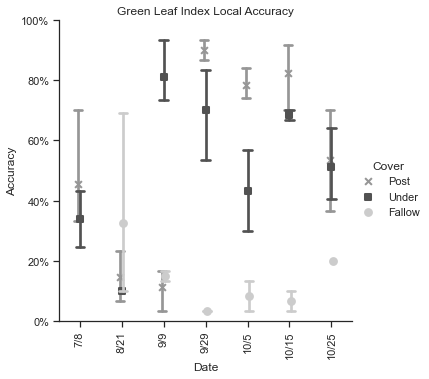

In [6]:
## GLI Local
sns.set_theme(style ="ticks")


ax = sns.catplot(x = "Date", y = "GLI_Local_AC",  hue="Cover", markers = ["x", "s", "o"], ## 'x', 'square', and 'point'
                 data = Stats, palette = ["#969696", "#525252", "#cccccc"], kind = "point",  capsize = .2, dodge  = True, join = False)
ax.set_ylabels("Accuracy")
ax.set(ylim=(0,1))                                                         ## Y max is 100%
ax.axes.flat[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))  ## Decimal to percent
ax.set_xticklabels(["7/8", "8/21", "9/9", "9/29", "10/5", "10/15", "10/25"], rotation= 90) ## Manual override date values
ax.set(title= "Green Leaf Index Local Accuracy")

ax.savefig(graph_out + "GLI_LOCAL_AC", dpi= 300)

C:\Users\Owner\anaconda3\envs\ag_env\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.5882352941176471, 0.5882352941176471, 0.5882352941176471)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


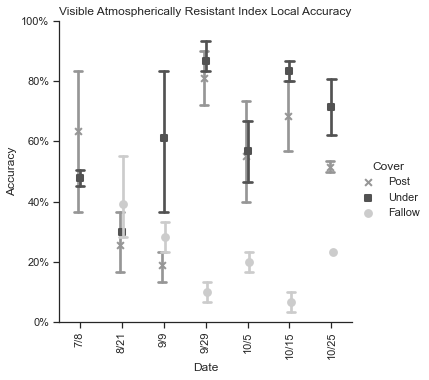

In [7]:
## VARI Local
sns.set_theme(style ="ticks")


ax = sns.catplot(x = "Date", y = "VARI_Local_AC",  hue="Cover", markers = ["x", "s", "o"], ## 'x', 'square', and 'point'
                 data = Stats, palette = ["#969696", "#525252", "#cccccc"], kind = "point",  capsize = .2, dodge  = True, join = False)
ax.set_ylabels("Accuracy")
ax.set(ylim=(0,1))                                                          ## Y max 100%
ax.axes.flat[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))   ## Decimal to percent
ax.set_xticklabels(["7/8", "8/21", "9/9", "9/29", "10/5", "10/15", "10/25"], rotation= 90) ## Manual override date values
ax.set(title= "Visible Atmospherically Resistant Index Local Accuracy")

ax.savefig(graph_out + "VARI_LOCAL_AC", dpi = 300)

C:\Users\Owner\anaconda3\envs\ag_env\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.5882352941176471, 0.5882352941176471, 0.5882352941176471)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


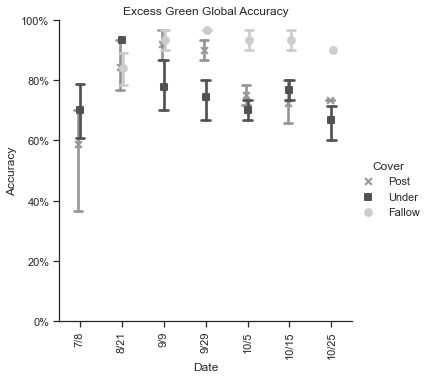

In [8]:
## EXG Global
sns.set_theme(style ="ticks")


ax = sns.catplot(x = "Date", y = "EXG_Global_AC",  hue="Cover", markers = ["x", "s", "o"], ## 'x', 'square', and 'point'
                 data = Stats, palette = ["#969696", "#525252", "#cccccc"], kind = "point",  capsize = .2, dodge  = True, join = False)
ax.set_ylabels("Accuracy")
ax.set(ylim=(0,1))                                                         ## Y max 100%
ax.axes.flat[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))  ## Decimal to percent
ax.set_xticklabels(["7/8", "8/21", "9/9", "9/29", "10/5", "10/15", "10/25"], rotation= 90) ## Manual override date values
ax.set(title= "Excess Green Global Accuracy")

ax.savefig(graph_out + "EXG_GLOBAL_AC", dpi = 300)

C:\Users\Owner\anaconda3\envs\ag_env\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.5882352941176471, 0.5882352941176471, 0.5882352941176471)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


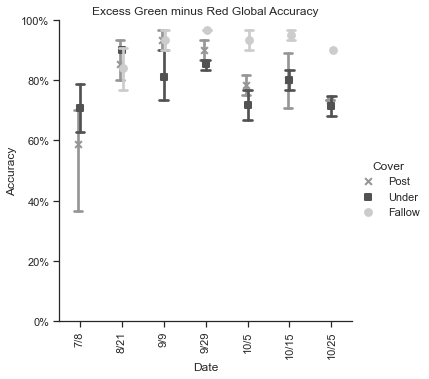

In [9]:
## EXGR Global
sns.set_theme(style ="ticks")


ax = sns.catplot(x = "Date", y = "EXGR_Global_AC",  hue="Cover", markers = ["x", "s", "o"], ## 'x', 'square', and 'point'
                 data = Stats, palette = ["#969696", "#525252", "#cccccc"], kind = "point",  capsize = .2, dodge  = True, join = False)
ax.set_ylabels("Accuracy")
ax.set(ylim=(0,1))                                                        ## Y max 100%
ax.axes.flat[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1)) ## Decimal to percent
ax.set_xticklabels(["7/8", "8/21", "9/9", "9/29", "10/5", "10/15", "10/25"], rotation= 90) ## Manual override date values
ax.set(title= "Excess Green minus Red Global Accuracy")

ax.savefig(graph_out + "EXGR_GLOBAL_AC", dpi = 300)

C:\Users\Owner\anaconda3\envs\ag_env\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.5882352941176471, 0.5882352941176471, 0.5882352941176471)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


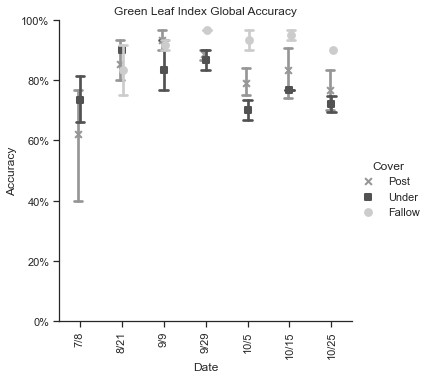

In [10]:
## GLI Global
sns.set_theme(style ="ticks")


ax = sns.catplot(x = "Date", y = "GLI_Global_AC",  hue="Cover", markers = ["x", "s", "o"], ## 'x', 'square', and 'point'
                 data = Stats, palette = ["#969696", "#525252", "#cccccc"], kind = "point",  capsize = .2, dodge  = True, join = False)
ax.set_ylabels("Accuracy")
ax.set(ylim=(0,1))                                                          ## Y max 100%
ax.axes.flat[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))   ## Decimal to percent
ax.set_xticklabels(["7/8", "8/21", "9/9", "9/29", "10/5", "10/15", "10/25"], rotation= 90) ## Manual override date values
ax.set(title= "Green Leaf Index Global Accuracy")

ax.savefig(graph_out + "GLI_GLOBAL_AC", dpi = 300)

C:\Users\Owner\anaconda3\envs\ag_env\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.5882352941176471, 0.5882352941176471, 0.5882352941176471)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


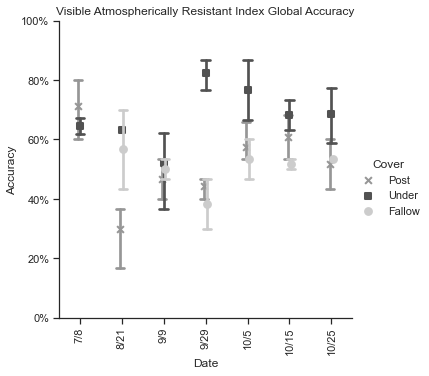

In [11]:
## VARI Global
sns.set_theme(style ="ticks")


ax = sns.catplot(x = "Date", y = "VARI_Global_AC",  hue="Cover", markers = ["x", "s", "o"], ## 'x', 'square', and 'point'
                 data = Stats, palette = ["#969696", "#525252", "#cccccc"], kind = "point",  capsize = .2, dodge  = True, join = False)
ax.set_ylabels("Accuracy")
ax.set(ylim=(0,1))                                                        ## Y max 100%
ax.axes.flat[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1)) ## Decimal to percent
ax.set_xticklabels(["7/8", "8/21", "9/9", "9/29", "10/5", "10/15", "10/25"], rotation= 90) ## Manual override date values
ax.set(title= "Visible Atmospherically Resistant Index Global Accuracy")

ax.savefig(graph_out + "VARI_GLOBAL_AC", dpi = 300)

C:\Users\Owner\anaconda3\envs\ag_env\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.5882352941176471, 0.5882352941176471, 0.5882352941176471)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


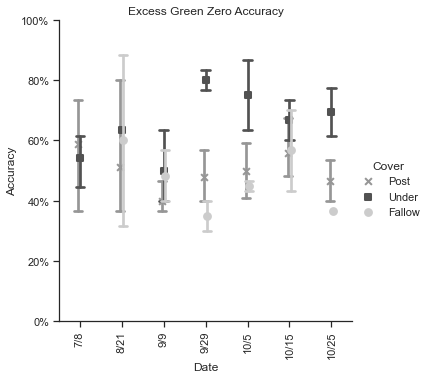

In [12]:
## EXG Zero
sns.set_theme(style ="ticks")


ax = sns.catplot(x = "Date", y = "EXG_Zero_AC",  hue="Cover", markers = ["x", "s", "o"], ## 'x', 'square', and 'point'
                 data = Stats, palette = ["#969696", "#525252", "#cccccc"], kind = "point",  capsize = .2, dodge  = True, join = False)
ax.set_ylabels("Accuracy")
ax.set(ylim=(0,1))                                                        ## Y max 100%
ax.axes.flat[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1)) ## Decimal to percent
ax.set_xticklabels(["7/8", "8/21", "9/9", "9/29", "10/5", "10/15", "10/25"], rotation= 90) ## Manual override date values
ax.set(title= "Excess Green Zero Accuracy")

ax.savefig(graph_out + "EXG_ZERO_AC", dpi = 300)

C:\Users\Owner\anaconda3\envs\ag_env\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.5882352941176471, 0.5882352941176471, 0.5882352941176471)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


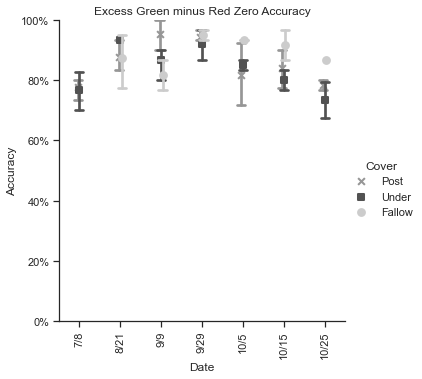

In [13]:
## EXGR Zero
sns.set_theme(style ="ticks")


ax = sns.catplot(x = "Date", y = "EXGR_Zero_AC",  hue="Cover", markers = ["x", "s", "o"], ## 'x', 'square', and 'point'
                 data = Stats, palette = ["#969696", "#525252", "#cccccc"], kind = "point",  capsize = .2, dodge  = True, join = False)
ax.set_ylabels("Accuracy")
ax.set(ylim=(0,1))                                                         ## Y max 100%
ax.axes.flat[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))  ## Decimal to percent
ax.set_xticklabels(["7/8", "8/21", "9/9", "9/29", "10/5", "10/15", "10/25"], rotation= 90) ## Manual override date values
ax.set(title= "Excess Green minus Red Zero Accuracy")

ax.savefig(graph_out + "EXGR_ZERO_AC", dpi = 300)

C:\Users\Owner\anaconda3\envs\ag_env\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.5882352941176471, 0.5882352941176471, 0.5882352941176471)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


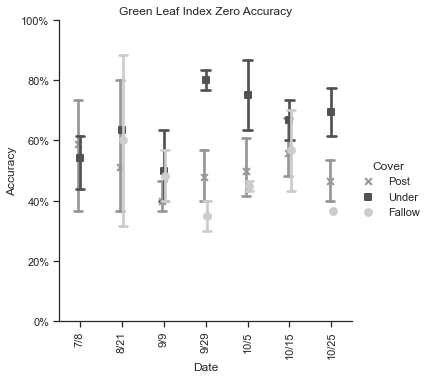

In [14]:
## GLI Zero
sns.set_theme(style ="ticks")


ax = sns.catplot(x = "Date", y = "GLI_Zero_AC",  hue="Cover", markers = ["x", "s", "o"], ## 'x', 'square', and 'point'
                 data = Stats, palette = ["#969696", "#525252", "#cccccc"], kind = "point",  capsize = .2, dodge  = True, join = False)
ax.set_ylabels("Accuracy")
ax.set(ylim=(0,1))                                                         ## Y max 100%
ax.axes.flat[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))  ## Decimal to percent
ax.set_xticklabels(["7/8", "8/21", "9/9", "9/29", "10/5", "10/15", "10/25"], rotation= 90) ## Manual override date values
ax.set(title= "Green Leaf Index Zero Accuracy")

ax.savefig(graph_out + "GLI_ZERO_AC", dpi = 300)

C:\Users\Owner\anaconda3\envs\ag_env\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.5882352941176471, 0.5882352941176471, 0.5882352941176471)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


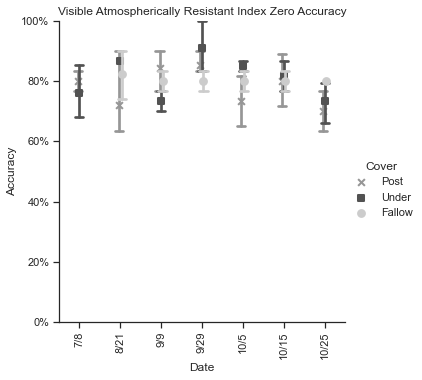

In [15]:
## VARI Zero
sns.set_theme(style ="ticks")


ax = sns.catplot(x = "Date", y = "VARI_Zero_AC",  hue="Cover", markers = ["x", "s", "o"], ## 'x', 'square', and 'point'
                 data = Stats, palette = ["#969696", "#525252", "#cccccc"], kind = "point",  capsize = .2, dodge  = True, join = False)
ax.set_ylabels("Accuracy")
ax.set(ylim=(0,1))                                                        ## Y max 100%
ax.axes.flat[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1)) ## Decimal to percent
ax.set_xticklabels(["7/8", "8/21", "9/9", "9/29", "10/5", "10/15", "10/25"], rotation= 90) ## Manual override date values
ax.set(title= "Visible Atmospherically Resistant Index Zero Accuracy")

ax.savefig(graph_out + "VARI_ZERO_AC", dpi = 300)

C:\Users\Owner\anaconda3\envs\ag_env\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.5882352941176471, 0.5882352941176471, 0.5882352941176471)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


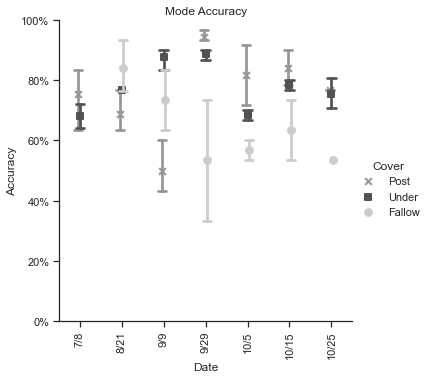

In [16]:
## Mode 
sns.set_theme(style ="ticks")


ax = sns.catplot(x = "Date", y = "ALL_Mode_AC",  hue="Cover", markers = ["x", "s", "o"], ## 'x', 'square', and 'point'
                 data = Stats, palette = ["#969696", "#525252", "#cccccc"], kind = "point",  capsize = .2, dodge  = True, join = False)
ax.set_ylabels("Accuracy")
ax.set(ylim=(0,1))                                                         ## Y max 100%
ax.axes.flat[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))  ## Decimal to percent
ax.set_xticklabels(["7/8", "8/21", "9/9", "9/29", "10/5", "10/15", "10/25"], rotation= 90) ## Manual override date values
ax.set(title= "Mode Accuracy")

ax.savefig(graph_out + "Mode_AC", dpi = 300)

C:\Users\Owner\anaconda3\envs\ag_env\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.5882352941176471, 0.5882352941176471, 0.5882352941176471)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


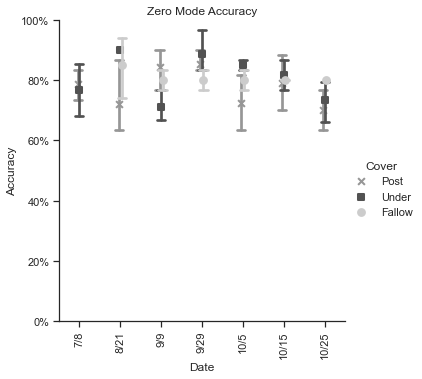

In [17]:
## Zero Mode
sns.set_theme(style ="ticks")


ax = sns.catplot(x = "Date", y = "ZERO_Mode_AC",  hue="Cover", markers = ["x", "s", "o"], ## 'x', 'square', and 'point'
                 data = Stats, palette = ["#969696", "#525252", "#cccccc"], kind = "point",  capsize = .2, dodge  = True, join = False)
ax.set_ylabels("Accuracy")
ax.set(ylim=(0,1))                                                          ## Y max 100%
ax.axes.flat[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))   ## Decimal to percent
ax.set_xticklabels(["7/8", "8/21", "9/9", "9/29", "10/5", "10/15", "10/25"], rotation= 90) ## Manual override date values
ax.set(title= "Zero Mode Accuracy")

ax.savefig(graph_out + "Zero_Mode_AC", dpi = 300)

C:\Users\Owner\anaconda3\envs\ag_env\lib\site-packages\seaborn\categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.5882352941176471, 0.5882352941176471, 0.5882352941176471)) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


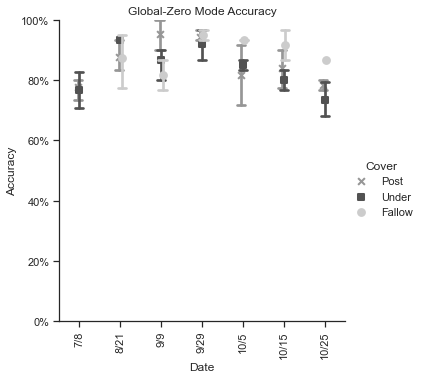

In [18]:
## Global Zero Mode
sns.set_theme(style ="ticks")


ax = sns.catplot(x = "Date", y = "GLOBAL_ZERO_Mode_AC",  hue="Cover", markers = ["x", "s", "o"], ## 'x', 'square', and 'point'
                 data = Stats, palette = ["#969696", "#525252", "#cccccc"], kind = "point",  capsize = .2, dodge  = True, join = False)
ax.set_ylabels("Accuracy")
ax.set(ylim=(0,1))                                                          ## Y max 100%
ax.axes.flat[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))   ## Decimal to percent
ax.set_xticklabels(["7/8", "8/21", "9/9", "9/29", "10/5", "10/15", "10/25"], rotation= 90) ## Manual override date values
ax.set(title= "Global-Zero Mode Accuracy")

ax.savefig(graph_out + "Global_Zero_Mode_AC", dpi = 300)

## Reference Correlations
The next cells use the reference colors and indices to find correlations between ground-truthed  vegetation and ground-truth non-vegetation. Seborn will create a joint plot that has a histogram  and a scatter plot of vegetation (in orange) and non-vegetation (in blue). 

In [19]:
Ground_Truth = pd.read_csv("./Ground_Truth.csv")

In [20]:
Ground_Truth

,Image,Plot,X,Y,Date_Index,Date,Variety,Cover,Reference,Predicted_EXG_L,...,Predicted_ALL_MODE,Predicted_ZERO_MODE,Predicted_GLOBAL_ZERO_MODE,EXG_Value,EXGR_Value,GLI_Value,VARI_Value,Red_Value,Green_Value,Blue_Value
0,302A_20210708,302A,1162.0,330.0,20210708,07/08/2021,Oat,Post,1,1,...,1,0,0,0.044479,-0.096933,0.032992,-0.003876,0.349693,0.348160,0.302147
1,302A_20210708,302A,659.0,277.0,20210708,07/08/2021,Oat,Post,0,1,...,1,0,0,0.035000,-0.113500,0.026022,-0.018987,0.352500,0.345000,0.302500
2,302A_20210708,302A,1255.0,34.0,20210708,07/08/2021,Oat,Post,1,1,...,1,0,0,0.171004,-0.031970,0.122995,-0.053254,0.423792,0.390335,0.185874
3,302A_20210708,302A,757.0,1186.0,20210708,07/08/2021,Oat,Post,0,1,...,1,1,1,0.197719,0.022053,0.141304,-0.018405,0.410646,0.399240,0.190114
4,302A_20210708,302A,1258.0,337.0,20210708,07/08/2021,Oat,Post,1,1,...,1,1,1,0.143750,0.004375,0.104072,0.018519,0.371875,0.381250,0.246875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,103C_20210909,103C,1100.0,1234.0,20210909,09/09/2021,Oat,Under,0,0,...,0,1,0,0.076923,-0.058689,0.056604,0.013423,0.353276,0.358974,0.287749
1676,103C_20210909,103C,1049.0,419.0,20210909,09/09/2021,Oat,Under,0,0,...,0,0,0,0.071429,-0.071429,0.052632,0.000000,0.357143,0.357143,0.285714
1677,103C_20210909,103C,354.0,168.0,20210909,09/09/2021,Oat,Under,0,0,...,0,0,0,0.053371,-0.096910,0.039501,-0.016779,0.358146,0.351124,0.290730
1678,103C_20210909,103C,706.0,970.0,20210909,09/09/2021,Oat,Under,1,1,...,1,1,1,0.267380,0.278075,0.187970,0.296296,0.294118,0.422460,0.283422


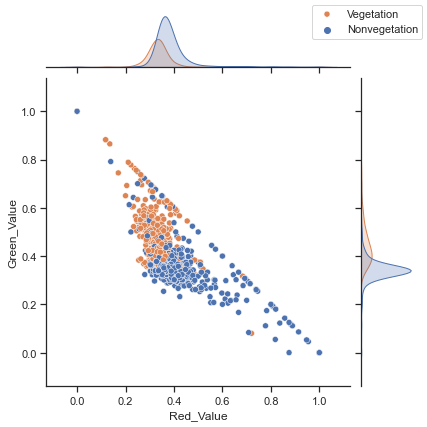

In [21]:
## Green vs Red

sns.set_theme(style = "ticks")
ax = sns.jointplot(x = "Red_Value", y = "Green_Value", data = Ground_Truth, 
                hue = "Reference")
ax.ax_joint.legend_._visible= False                          ## removes default legend 
ax.fig.legend(labels = ["Vegetation", "Nonvegetation"])      ## 1, 0

ax.savefig(graph_out+ "Reference_Color", bbox_inches = "tight", dpi = 300)


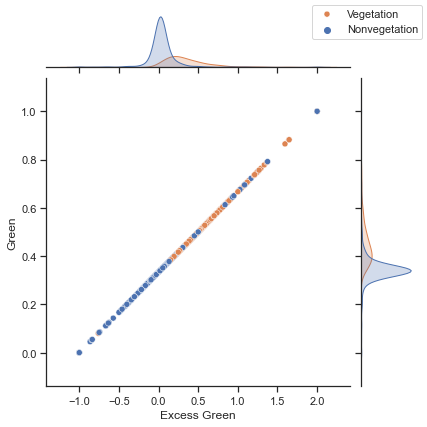

In [22]:
## Green vs EXG

sns.set_theme(style = "ticks")
ax = sns.jointplot(x = "EXG_Value", y = "Green_Value", data = Ground_Truth, 
                hue = "Reference")
ax.ax_joint.legend_._visible= False                      ## Removes default legend            
ax.set_axis_labels("Excess Green", "Green")
ax.fig.legend(labels = ["Vegetation", "Nonvegetation"])  ## 1, 0
ax.savefig(graph_out + "Reference_EXG", bbox_inches = "tight", dpi = 300)

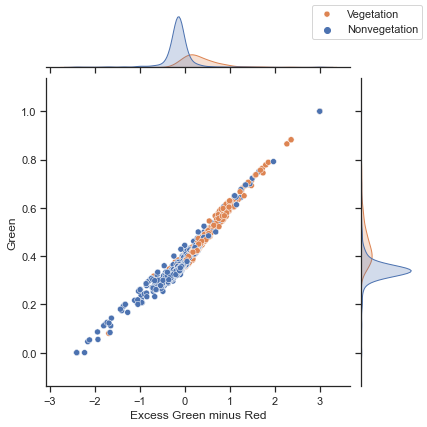

In [23]:
## Green vs EXGR

sns.set_theme(style = "ticks")
ax = sns.jointplot(x = "EXGR_Value", y = "Green_Value", data = Ground_Truth, 
                hue = "Reference")
ax.ax_joint.legend_._visible= False                         ## Removes default legend   
ax.fig.legend(labels = ["Vegetation", "Nonvegetation"])  ## 1, 0
ax.set_axis_labels("Excess Green minus Red", "Green")

ax.savefig(graph_out + "Reference_EXGR", bbox_inches = "tight", dpi = 300)

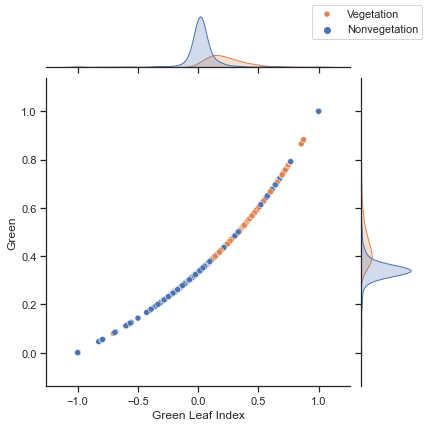

In [24]:
sns.set_theme(style = "ticks")
ax = sns.jointplot(x = "GLI_Value", y = "Green_Value", data = Ground_Truth, 
                hue = "Reference")
ax.ax_joint.legend_._visible= False                      ## Removes default legend   
ax.fig.legend(labels = ["Vegetation", "Nonvegetation"])  ## 1, 0
ax.set_axis_labels("Green Leaf Index", "Green")

ax.savefig(graph_out + "Reference_GLI", bbox_inches = "tight", dpi = 300)

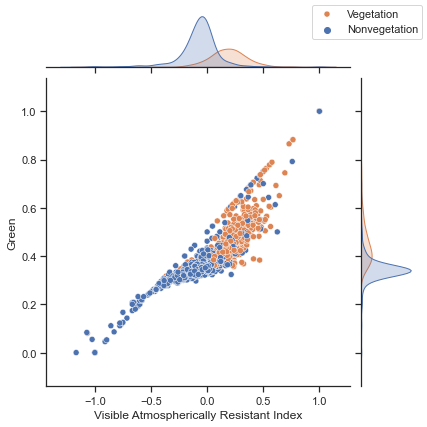

In [25]:
sns.set_theme(style = "ticks")
ax = sns.jointplot(x = "VARI_Value", y = "Green_Value", data = Ground_Truth, 
                hue = "Reference")
ax.ax_joint.legend_._visible= False                       ## Removes default legend   
ax.fig.legend(labels = ["Vegetation", "Nonvegetation"])   ## 1, 0
ax.set_axis_labels( "Visible Atmospherically Resistant Index", "Green")

ax.savefig(graph_out + "Reference_VARI", bbox_inches = "tight", dpi = 300)

## Visuallizing Percent Vegetation 

The next few cells will be used to graph percent vegetation over time calulated by classified EXGR Zero Vegetation. The dates are converted to integers to make the relative distance between them correct. Then seaborn will be used to create a line graph with 95% confidence intervals. Oat harvest date and post clover plant date are aslo shown. 

In [26]:
Oat_Data = pd.read_csv("Oat_Data.csv")

In [27]:
Oat_Data.Date=pd.to_datetime(Oat_Data.Date, format="%m/%d/%Y")  

In [28]:
Days = Oat_Data.Date -Oat_Data.Date.min()  ## Date 7/8 will be 0

In [29]:
Oat_Data["Days"] = Days.dt.days ## Days as integer

C:\Users\Owner\AppData\Local\Temp\ipykernel_21708\1566151356.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(xlabel = "Date", ylabel = "Vegetation Cover",
C:\Users\Owner\AppData\Local\Temp\ipykernel_21708\1566151356.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = ["7/3", "7/8", "7/28", "8/17", "9/6", "9/26", "10/16", "10/31"], rotation= 90) ## first date not shown in the manual override.


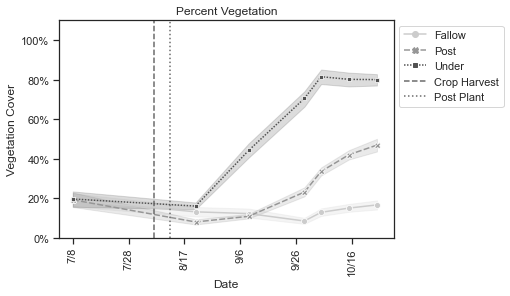

In [30]:
sns.set_theme(style ="ticks")

ax = sns.lineplot(data = Oat_Data, x="Days", y="Vegetation_Fraction",   
                   hue="Cover", palette = ["#cccccc", "#969696", "#525252"], style = "Cover", markers = True)  

ax.set(xlabel = "Date", ylabel = "Vegetation Cover",  
        ylim=(0,1.1), xlim=(-5, 115), 
        yticklabels = (["0%", "20%", "40%", "60%", "80%", "100%"]),  ## Mannual override Y labels
       title = "Percent Vegetation") 
ax.set_xticklabels(labels = ["7/3", "7/8", "7/28", "8/17", "9/6", "9/26", "10/16", "10/31"], rotation= 90) ## first date not shown in the manual override.
ax.axvline(29, color='dimgrey', ls = "--", label = "Crop Harvest")  ## Crop harvest on 8/6
ax.axvline(35, color='dimgrey', ls = ":", label = "Post Plant")     ## Post Seeded clover planted on 8/12
ax.legend(bbox_to_anchor=(1,1))

plt.savefig(graph_out + "Percent_Vegetation", bbox_inches = "tight", dpi = 300)



## Harvest Metrics

The final cells use the final date and harvest metrices to find biomass, nitrogen, and carbon:nitrgen correlations with the mean indices. First, the final date is clipped from the rest of the data. Then, the clover biomass (kg/ha),  nitrogen (% by mass), and carbon:nitrogen (ratio) are mergeed to the dataframe. Finally, fallow data is removed. 

In [31]:
Bio_Data = pd.read_excel("Oat-Clover_Plot_Map_and_Datasheet.xlsx")

In [32]:
Harvest = Oat_Data[(Oat_Data["Date_Index"]== 20211025)].reset_index(drop = True)  ##Separates the last date. 

In [33]:
Harvest

,Image,Plot,Date_Index,Date,Variety,Cover,Green_Avg,EXG_Avg_Image,EXGR_Avg_Image,GLI_Avg_Image,...,EXGR_Global_Thresh,GLI_Global_Thresh,VARI_Global_Thresh,Vegetation_Fraction,Green_Avg_Vegetation,EXG_Avg_Vegetation,EXGR_Avg_Vegetation,GLI_Avg_Vegetation,VARI_Avg_Vegetation,Days
0,101A_20211025,101A,20211025,2021-10-25,Oat,Fallow,0.340791,0.022484,-0.188345,0.004368,...,0.205078,0.160156,-0.089844,0.193043,0.435801,0.307403,0.274478,0.202781,0.170827,109
1,101B_20211025,101B,20211025,2021-10-25,Oat,Post,0.398933,0.196890,0.083133,0.123418,...,0.205078,0.160156,-0.089844,0.515324,0.464835,0.394505,0.395593,0.255770,0.203921,109
2,101C_20211025,101C,20211025,2021-10-25,Oat,Under,0.469053,0.407197,0.413225,0.261080,...,0.205078,0.160156,-0.089844,0.861217,0.489601,0.468803,0.511404,0.301195,0.254713,109
3,102A_20211025,102A,20211025,2021-10-25,Oat,Fallow,0.321901,-0.034138,-0.291791,-0.038801,...,0.205078,0.160156,-0.089844,0.087225,0.439954,0.319862,0.302392,0.206491,0.192812,109
4,102B_20211025,102B,20211025,2021-10-25,Oat,Post,0.366825,0.100571,-0.089723,0.057934,...,0.205078,0.160156,-0.089844,0.330060,0.454432,0.363296,0.338523,0.238310,0.173894,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,409B_20211025,409B,20211025,2021-10-25,Oat,Fallow,0.324957,-0.025017,-0.260596,-0.029944,...,0.205078,0.160156,-0.089844,0.101028,0.427930,0.283790,0.266255,0.186371,0.212816,109
116,409C_20211025,409C,20211025,2021-10-25,Oat,Post,0.403345,0.210126,0.108752,0.131284,...,0.205078,0.160156,-0.089844,0.542867,0.468458,0.405373,0.420653,0.262521,0.229079,109
117,410A_20211025,410A,20211025,2021-10-25,Oat,Under,0.486970,0.460969,0.502542,0.290155,...,0.205078,0.160156,-0.089844,0.875943,0.508097,0.524291,0.604697,0.330985,0.298510,109
118,410B_20211025,410B,20211025,2021-10-25,Oat,Fallow,0.336206,0.008785,-0.204253,-0.007075,...,0.205078,0.160156,-0.089844,0.165693,0.444000,0.332001,0.325336,0.215333,0.212896,109


In [34]:
Harvest["Biomass"] = Bio_Data["clover_fall_kg_ha"]  ##Biomass (kg/ha)

In [35]:
Harvest["Nitrogen"]= Bio_Data["clover_N_fall"] ##Nitrogen (percent by mass)

In [36]:
Harvest["Carbon_Nitrogen"] = Bio_Data["clover_cn_fall"] ##Carbon-Nitrogen Ratio

In [37]:
Harvest

,Image,Plot,Date_Index,Date,Variety,Cover,Green_Avg,EXG_Avg_Image,EXGR_Avg_Image,GLI_Avg_Image,...,Vegetation_Fraction,Green_Avg_Vegetation,EXG_Avg_Vegetation,EXGR_Avg_Vegetation,GLI_Avg_Vegetation,VARI_Avg_Vegetation,Days,Biomass,Nitrogen,Carbon_Nitrogen
0,101A_20211025,101A,20211025,2021-10-25,Oat,Fallow,0.340791,0.022484,-0.188345,0.004368,...,0.193043,0.435801,0.307403,0.274478,0.202781,0.170827,109,0.000000,NaN,NaN
1,101B_20211025,101B,20211025,2021-10-25,Oat,Post,0.398933,0.196890,0.083133,0.123418,...,0.515324,0.464835,0.394505,0.395593,0.255770,0.203921,109,135.036087,4.6815,9.518744
2,101C_20211025,101C,20211025,2021-10-25,Oat,Under,0.469053,0.407197,0.413225,0.261080,...,0.861217,0.489601,0.468803,0.511404,0.301195,0.254713,109,701.976108,3.1371,14.062670
3,102A_20211025,102A,20211025,2021-10-25,Oat,Fallow,0.321901,-0.034138,-0.291791,-0.038801,...,0.087225,0.439954,0.319862,0.302392,0.206491,0.192812,109,0.000000,NaN,NaN
4,102B_20211025,102B,20211025,2021-10-25,Oat,Post,0.366825,0.100571,-0.089723,0.057934,...,0.330060,0.454432,0.363296,0.338523,0.238310,0.173894,109,222.386454,4.0756,10.506920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,409B_20211025,409B,20211025,2021-10-25,Oat,Fallow,0.324957,-0.025017,-0.260596,-0.029944,...,0.101028,0.427930,0.283790,0.266255,0.186371,0.212816,109,0.000000,NaN,NaN
116,409C_20211025,409C,20211025,2021-10-25,Oat,Post,0.403345,0.210126,0.108752,0.131284,...,0.542867,0.468458,0.405373,0.420653,0.262521,0.229079,109,182.809951,3.6463,11.697610
117,410A_20211025,410A,20211025,2021-10-25,Oat,Under,0.486970,0.460969,0.502542,0.290155,...,0.875943,0.508097,0.524291,0.604697,0.330985,0.298510,109,976.631753,3.1714,13.706560
118,410B_20211025,410B,20211025,2021-10-25,Oat,Fallow,0.336206,0.008785,-0.204253,-0.007075,...,0.165693,0.444000,0.332001,0.325336,0.215333,0.212896,109,0.000000,NaN,NaN


In [38]:
Harvest = Harvest[(Harvest["Cover"]!="Fallow")]               ## Removes all fallow plots (e.g. no data)

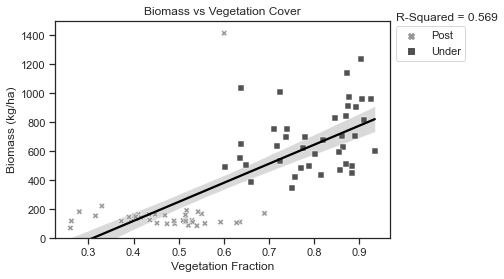

In [39]:
## Biomass vs VC (from EXGR Zero)

sns.set_theme(style ="ticks")
line = sns.regplot(x = "Vegetation_Fraction", y = "Biomass", data = Harvest, scatter = False, color = "black")  ## TrendLine 
line.set(ylim = (0, 1500))
line.text(.98, 1500, "R-Squared = " + "{:.3f}".format(stats.pearsonr(Harvest["Vegetation_Fraction"],Harvest["Biomass"])[0]**2)) ## R-Squared
ax = sns.scatterplot(x = "Vegetation_Fraction", y = "Biomass", data = Harvest, 
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = "Vegetation Fraction", ylabel = "Biomass (kg/ha)",
       title = "Biomass vs Vegetation Cover")
ax.legend(bbox_to_anchor=(1,1))

plt.savefig(graph_out + "Biomass_VC", bbox_inches = "tight", dpi = 300)

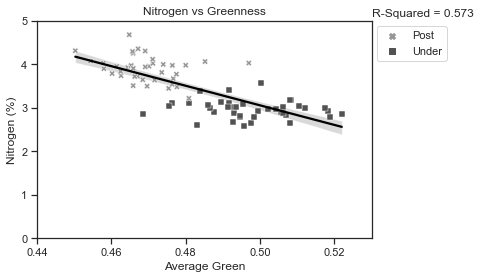

In [40]:
## Nitrogen vs Greenness
sns.set_theme(style ="ticks")
line = sns.regplot(x = "Green_Avg_Vegetation", y = "Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.53, 5.1, "R-Squared = " + "{:.3f}".format(stats.pearsonr(Harvest["Green_Avg_Vegetation"],Harvest["Nitrogen"])[0]**2)) ## R-Squared
ax = sns.scatterplot(x = "Green_Avg_Vegetation", y = "Nitrogen", data = Harvest[(Harvest["Cover"]!="Fallow")],
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = "Average Green", ylabel = "Nitrogen (%)",
       xlim = (0.44, 0.53), ylim = (0, 5),
       title = "Nitrogen vs Greenness")
ax.legend(bbox_to_anchor=(1.24,1))

plt.savefig(graph_out + "Nitrogen_Greenness", bbox_inches = "tight", dpi = 300)

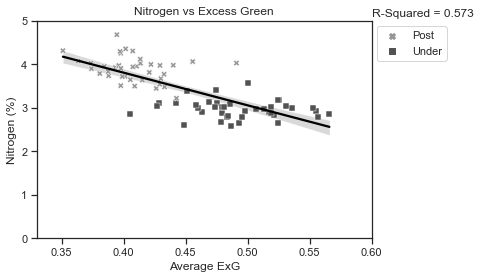

In [41]:
## Nitrogen vs EXG

sns.set_theme(style ="ticks")
line = sns.regplot(x = "EXG_Avg_Vegetation", y = "Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.6, 5.1, "R-Squared = " + "{:.3f}".format(stats.pearsonr(Harvest["EXG_Avg_Vegetation"],Harvest["Nitrogen"])[0]**2)) ## R-Squared
ax = sns.scatterplot(x = "EXG_Avg_Vegetation", y = "Nitrogen", data = Harvest[(Harvest["Cover"]!="Fallow")],
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = "Average ExG", ylabel = "Nitrogen (%)",
       xlim = (0.33, 0.6), ylim= (0,5),
       title = "Nitrogen vs Excess Green")
ax.legend(bbox_to_anchor=(1.24,1))

plt.savefig(graph_out + "Nitrogen_EXG", bbox_inches = "tight", dpi = 300)

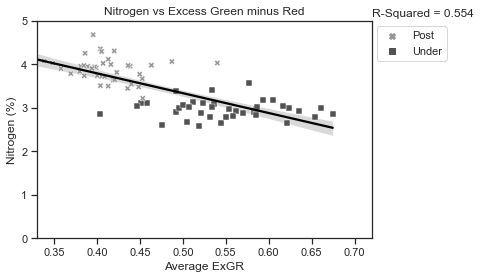

In [42]:
## Nitrogen vs EXGR

sns.set_theme(style ="ticks")
line = sns.regplot(x = "EXGR_Avg_Vegetation", y = "Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.72, 5.1, "R-Squared = " + "{:.3f}".format(stats.pearsonr(Harvest["EXGR_Avg_Vegetation"],Harvest["Nitrogen"])[0]**2)) ## R-Squared
ax = sns.scatterplot(x = "EXGR_Avg_Vegetation", y = "Nitrogen", data = Harvest[(Harvest["Cover"]!="Fallow")],
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = "Average ExGR", ylabel = "Nitrogen (%)",
       xlim = (0.33, 0.72), ylim = (0,5),
       title = "Nitrogen vs Excess Green minus Red")
ax.legend(bbox_to_anchor=(1.24,1))

plt.savefig(graph_out + "Nitrogen_EXGR", bbox_inches = "tight", dpi = 300)

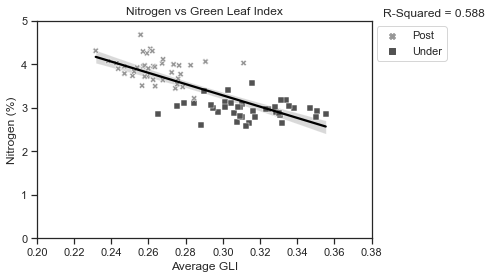

In [43]:
## Nitrogen vs GLI

sns.set_theme(style ="ticks")
line = sns.regplot(x = "GLI_Avg_Vegetation", y = "Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.386, 5.1, "R-Squared = " + "{:.3f}".format(stats.pearsonr(Harvest["GLI_Avg_Vegetation"],Harvest["Nitrogen"])[0]**2)) ## R-Squared
ax = sns.scatterplot(x = "GLI_Avg_Vegetation", y = "Nitrogen", data = Harvest[(Harvest["Cover"]!="Fallow")],
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = "Average GLI", ylabel = "Nitrogen (%)",
       xlim = (0.2, 0.38), ylim = (0,5),
       title = "Nitrogen vs Green Leaf Index")
ax.legend(bbox_to_anchor=(1.24,1))

plt.savefig(graph_out + "Nitrogen_GLI", bbox_inches = "tight", dpi = 300)

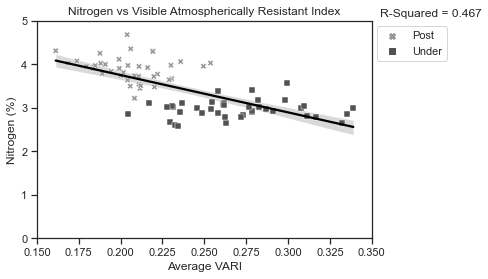

In [44]:
## Nitrogen vs VARI

sns.set_theme(style ="ticks")
line = sns.regplot(x = "VARI_Avg_Vegetation", y = "Nitrogen", data = Harvest, scatter = False, color = "black") ## TrendLine
line.text(.355, 5.1, "R-Squared = " + "{:.3f}".format(stats.pearsonr(Harvest["VARI_Avg_Vegetation"],Harvest["Nitrogen"])[0]**2)) ## R-Squared
ax = sns.scatterplot(x = "VARI_Avg_Vegetation", y = "Nitrogen", data = Harvest[(Harvest["Cover"]!="Fallow")],
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = "Average VARI", ylabel = "Nitrogen (%)",
       xlim = (0.15, 0.35), ylim  =(0,5),
       title = "Nitrogen vs Visible Atmospherically Resistant Index")
ax.legend(bbox_to_anchor=(1.24,1))

plt.savefig(graph_out + "Nitrogen_VARI", bbox_inches = "tight", dpi = 300)

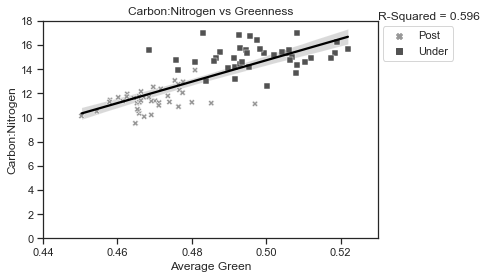

In [45]:
## Carbon:NItrogen vs Greenness

sns.set_theme(style ="ticks")
line = sns.regplot(x = "Green_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.53, 18.1, "R-Squared = " + "{:.3f}".format(stats.pearsonr(Harvest["Green_Avg_Vegetation"],Harvest["Carbon_Nitrogen"])[0]**2)) ## R-Squared
ax = sns.scatterplot(x = "Green_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest[(Harvest["Cover"]!="Fallow")],
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = "Average Green", ylabel = "Carbon:Nitrogen",
       xlim = (0.44, 0.53), ylim = (0,18),
       title = "Carbon:Nitrogen vs Greenness")
ax.legend(bbox_to_anchor=(1,1))

plt.savefig(graph_out + "CN_Greenness", bbox_inches = "tight", dpi = 300)

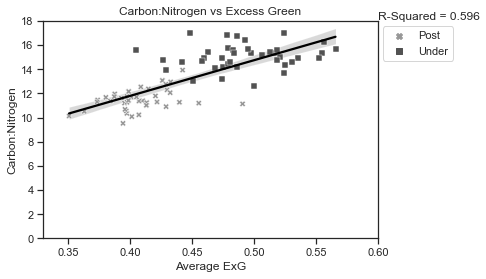

In [46]:
## Carbon:Nitrogen vs EXG

sns.set_theme(style ="ticks")
line = sns.regplot(x = "EXG_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.6, 18.1, "R-Squared = " + "{:.3f}".format(stats.pearsonr(Harvest["EXG_Avg_Vegetation"],Harvest["Carbon_Nitrogen"])[0]**2)) ## R-Squared
ax = sns.scatterplot(x = "EXG_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest[(Harvest["Cover"]!="Fallow")],
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = "Average ExG", ylabel = "Carbon:Nitrogen",
       xlim = (0.33, 0.6), ylim = (0, 18),
       title = "Carbon:Nitrogen vs Excess Green")
ax.legend(bbox_to_anchor=(1,1))

plt.savefig(graph_out + "CN_EXG", bbox_inches = "tight", dpi = 300)

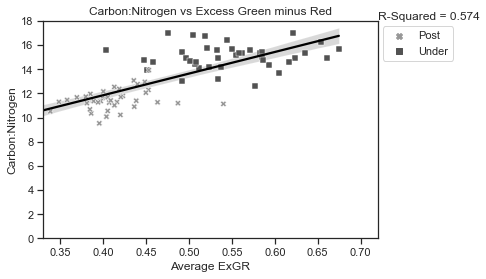

In [47]:
## Carbon:Nitrogen vs EXGR

sns.set_theme(style ="ticks")
line = sns.regplot(x = "EXGR_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.72, 18.1, "R-Squared = " + "{:.3f}".format(stats.pearsonr(Harvest["EXGR_Avg_Vegetation"],Harvest["Carbon_Nitrogen"])[0]**2)) ## R-Squared
ax = sns.scatterplot(x = "EXGR_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest[(Harvest["Cover"]!="Fallow")],
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = "Average ExGR", ylabel = "Carbon:Nitrogen",
       xlim = (0.33, 0.72), ylim = (0, 18),
       title = "Carbon:Nitrogen vs Excess Green minus Red")
ax.legend(bbox_to_anchor=(1,1))


plt.savefig(graph_out + "CN_EXGR", bbox_inches = "tight", dpi = 300)

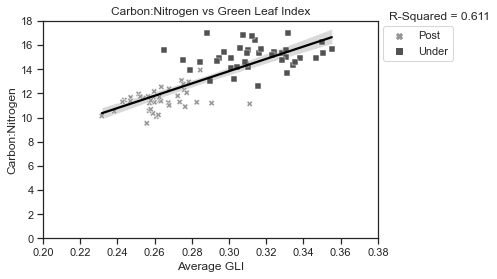

In [48]:
## Carbon:Nitrogen vs GLI

sns.set_theme(style ="ticks")
line = sns.regplot(x = "GLI_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.text(.386, 18.1, "R-Squared = " + "{:.3f}".format(stats.pearsonr(Harvest["GLI_Avg_Vegetation"],Harvest["Carbon_Nitrogen"])[0]**2)) ## R-Squared
ax = sns.scatterplot(x = "GLI_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest[(Harvest["Cover"]!="Fallow")],
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = "Average GLI", ylabel = "Carbon:Nitrogen",
       xlim = (0.20, 0.38), ylim = (0, 18),
       title = "Carbon:Nitrogen vs Green Leaf Index")
ax.legend(bbox_to_anchor=(1,1))


plt.savefig(graph_out + "CN_GLI", bbox_inches = "tight", dpi = 300)

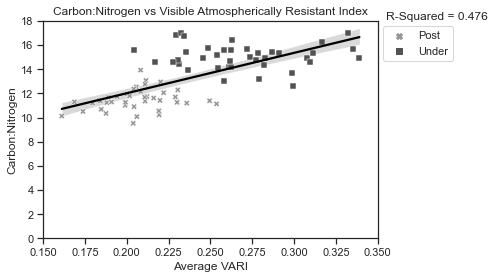

In [49]:
## Carbon:Nitrogen vs VARI

sns.set_theme(style ="ticks")
line = sns.regplot(x = "VARI_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest, scatter = False, color = "black")  ## TrendLine
line.set(ylim = (0))
line.text(.355, 18.1, "R-Squared = " + "{:.3f}".format(stats.pearsonr(Harvest["VARI_Avg_Vegetation"],Harvest["Carbon_Nitrogen"])[0]**2)) ## R-Squared
ax = sns.scatterplot(x = "VARI_Avg_Vegetation", y = "Carbon_Nitrogen", data = Harvest[(Harvest["Cover"]!="Fallow")],
                hue = "Cover", palette=["#969696", "#525252"], style = "Cover", markers = ["X", "s"])
ax.set(xlabel = "Average VARI", ylabel = "Carbon:Nitrogen",
       xlim = (0.15, 0.35), ylim = (0, 18),
       title = "Carbon:Nitrogen vs Visible Atmospherically Resistant Index")
ax.legend(bbox_to_anchor=(1,1))

plt.savefig(graph_out + "CN_VARI", bbox_inches = "tight", dpi = 300)

This concludes the notebook and the results of the project.